<a href="https://colab.research.google.com/github/trungtaos/CS331_CV/blob/main/code/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vietocr

     |████████████████████████████████| 280 kB 8.7 MB/s 
     |████████████████████████████████| 948 kB 36.5 MB/s 
  Attempting uninstall: lmdb
    Found existing installation: lmdb 0.99
    Uninstalling lmdb-0.99:
      Successfully uninstalled lmdb-0.99
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


In [2]:
! gdown --id 10fN1muWBCTKAZ7tHS5OVxBglsKrWgsC6
# ! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10fN1muWBCTKAZ7tHS5OVxBglsKrWgsC6
To: /content/data_line.zip
100% 389M/389M [00:02<00:00, 179MB/s]


In [3]:
! unzip  -qq -o data_line.zip

# Get images

In [4]:
import os
import glob2

DATA_PATH = './data_line'
IMG_PATH = os.path.join(DATA_PATH, 'out')
img_list = []

for img in ['*.jng']:
  image_files = glob2.glob(os.path.join(IMG_PATH, img))
  img_list += image_files

In [5]:
import numpy as np

def split_data(images, labels, shuffle=True):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    
    # 4. Split data into training and validation sets
    x_train ,x_test = train_test_split(data,test_size=0.2) 
    return x_train ,x_test

# Split train test

In [6]:
from sklearn.model_selection import train_test_split
import numpy

with open(DATA_PATH + '/labels.txt', 'r') as line:
  data = line.read().split('\n')
  # data = numpy.array(data)

  x_train ,x_test = split_data(np.array(img_list), numpy.array(data))
  # x_train ,x_test = train_test_split(data,test_size=0.2) 

In [7]:
x_train=[os.path.join('out/',i) for i in x_train]

In [8]:
x_test=[os.path.join('out/',i) for i in x_test]

## Write train.txt

In [9]:
with open("train_line_annotation.txt", 'w') as train:
  for num in x_train:
     train.write(num.partition(' ')[0] + '\t' + num.partition(' ')[2] +'\n')

In [10]:
mv '/content/train_line_annotation.txt' '/content/data_line'

## Write test.txt

In [11]:
with open("test_line_annotation.txt", 'w') as test:
  for num in x_test:
    test.write(num.partition(' ')[0] + '\t' + num.partition(' ')[2] +'\n')

In [12]:
mv '/content/test_line_annotation.txt' '/content/data_line'

# Train model

In [13]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change config

In [26]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [15]:
# config = Cfg.load_config_from_name('vgg_transformer')
config = Cfg.load_config_from_name('vgg_seq2seq')

In [16]:
# config['vocab'] = ' aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789@!"#$%&()*+,-./:;<=>?[\]^_`{|}~£¥§·—“”≪≫➡【】ー・くぐ〇〜ゝゞヽヾ一 '

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt',
    'image_height':64
}

params = {
         'print_every':500,
         'valid_every':15*20,
          'iters':10000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 5000,
          'batch_size': 6
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

config['vocab'] = ' aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789@!"#$%&()*+,-./:;<=>?[\]^_`{|}~θ£¥§·—“”≪≫➡【】ー・くぐ〇〜ゝゞヽヾ一‘ '

In [17]:
# config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&''()*+,-./:;<=>?@_`{|}~·θ’ '

In [18]:
rm -rf /content/train_hw

In [19]:
rm -rf /content/valid_hw

In [20]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
To: /root/.cache/gdown/tmpemmrvciy/dl
100%|██████████| 89.6M/89.6M [00:00<00:00, 158MB/s]


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth
transformer.decoder.embedding.weight missmatching shape, required torch.Size([257, 256]) but found torch.Size([233, 256])
transformer.decoder.fc_out.weight missmatching shape, required torch.Size([257, 1024]) but found torch.Size([233, 1024])
transformer.decoder.fc_out.bias missmatching shape, required torch.Size([257]) but found torch.Size([233])


Create train_hw: 100%|█████████████████████████████████████████| 8000/8000 [00:09<00:00, 877.06it/s]

Created dataset with 7999 samples



train_hw build cluster: 100%|████████████████████████████████| 7999/7999 [00:00<00:00, 82514.11it/s]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Create valid_hw: 100%|█████████████████████████████████████████| 2000/2000 [00:02<00:00, 915.02it/s]

Created dataset with 1999 samples



valid_hw build cluster: 100%|████████████████████████████████| 1999/1999 [00:00<00:00, 73228.88it/s]


In [21]:
trainer.config.save('config.yml')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


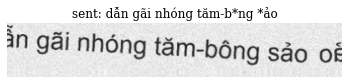

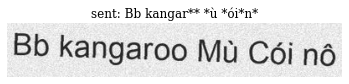

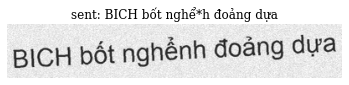

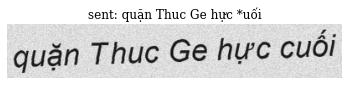

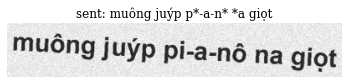

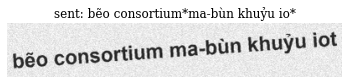

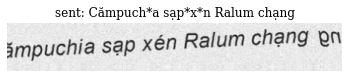

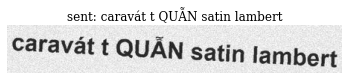

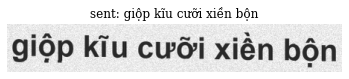

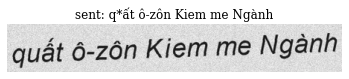

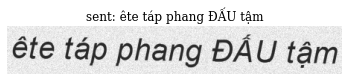

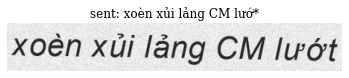

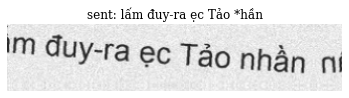

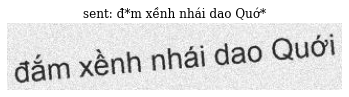

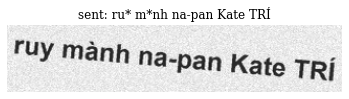

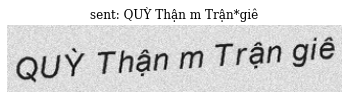

In [22]:
trainer.visualize_dataset()

In [27]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


RuntimeError: ignored

In [ ]:
# trainer.visualize_prediction()

In [ ]:
# trainer.precision()